In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [21]:
data_url = 'nbastats.csv'
df = pd.read_csv(data_url)

In [22]:
df.head()

,Season,Team,Championship,Age,W,L,PW,PL,MOV,SOS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23-24,Boston Celtics*,NaN,28.2,64.0,18.0,66.0,16.0,11.34,-0.60,...,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
1,23-24,Denver Nuggets*,NaN,27.1,57.0,25.0,54.0,28.0,5.26,-0.03,...,0.762,10.7,33.7,44.4,29.5,7.1,5.6,12.6,18.2,114.9
2,23-24,Oklahoma City Thunder*,NaN,23.4,57.0,25.0,58.0,24.0,7.41,-0.05,...,0.825,8.8,33.2,42.0,27.1,8.5,6.6,12.7,18.8,120.1
3,23-24,Minnesota Timberwolves*,NaN,27.2,56.0,26.0,57.0,25.0,6.45,-0.07,...,0.777,9.4,34.2,43.6,26.6,7.9,6.1,14.2,18.8,113.0
4,23-24,Los Angeles Clippers*,NaN,30.4,51.0,31.0,49.0,33.0,3.28,0.13,...,0.825,10.0,32.9,43.0,25.6,7.8,5.0,13.1,18.5,115.6


In [23]:
df.tail()

,Season,Team,Championship,Age,W,L,PW,PL,MOV,SOS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
854,96-97,Philadelphia 76ers,NC,25.5,22.0,60.0,24.0,58.0,-6.54,0.65,...,0.725,15.5,28.7,44.2,20.7,8.3,4.8,17.5,21.1,100.2
855,96-97,Denver Nuggets,NC,28.6,21.0,61.0,24.0,58.0,-6.28,-0.12,...,0.761,12.1,29.9,42.0,23.0,6.1,5.9,16.6,21.8,97.8
856,96-97,San Antonio Spurs,NC,29.9,20.0,62.0,19.0,63.0,-7.88,-0.05,...,0.719,13.4,26.0,39.4,20.3,7.9,5.3,15.2,21.5,90.5
857,96-97,Boston Celtics,NC,26.1,15.0,67.0,22.0,60.0,-7.33,0.71,...,0.750,13.4,26.7,40.0,21.9,9.9,3.8,16.4,23.4,100.6
858,96-97,Vancouver Grizzlies,NC,25.0,14.0,68.0,15.0,67.0,-10.23,0.06,...,0.709,12.5,26.3,38.8,22.7,8.0,5.7,15.9,21.4,89.2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        832 non-null    object 
 1   Team          832 non-null    object 
 2   Championship  802 non-null    object 
 3   Age           832 non-null    float64
 4   W             832 non-null    float64
 5   L             832 non-null    float64
 6   PW            832 non-null    float64
 7   PL            832 non-null    float64
 8   MOV           832 non-null    float64
 9   SOS           832 non-null    float64
 10  SRS           832 non-null    float64
 11  ORtg          832 non-null    float64
 12  DRtg          832 non-null    float64
 13  NRtg          832 non-null    float64
 14  Pace          832 non-null    float64
 15  FTr           832 non-null    float64
 16  3PAr          832 non-null    float64
 17  TS%           832 non-null    float64
 18  eFG%          832 non-null    

In [25]:
df.describe()

,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,...,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000
mean,26.780168,39.766827,39.766827,39.871394,39.662260,-0.005637,-0.000817,-0.006550,107.289303,107.281851,...,0.758720,11.192668,31.446154,42.636418,22.435817,7.667067,4.912500,14.518990,20.980288,101.404327
std,1.812453,12.677465,12.609700,12.351805,12.301864,4.620189,0.392119,4.494698,4.669368,4.513597,...,0.030914,1.478285,2.343033,2.088426,2.371053,0.886683,0.817093,1.215286,1.811707,7.728598
min,22.100000,7.000000,9.000000,7.000000,11.000000,-13.910000,-0.990000,-13.960000,92.200000,94.100000,...,0.660000,7.600000,24.900000,35.800000,15.600000,5.500000,2.400000,11.100000,15.600000,81.900000
25%,25.500000,30.750000,30.000000,31.000000,30.000000,-3.082500,-0.290000,-3.070000,104.100000,104.000000,...,0.741000,10.200000,29.700000,41.200000,20.800000,7.100000,4.300000,13.700000,19.700000,95.675000
50%,26.600000,41.000000,39.000000,40.000000,39.000000,0.275000,0.000000,0.225000,106.800000,107.100000,...,0.759000,11.100000,31.250000,42.600000,22.100000,7.600000,4.900000,14.500000,20.900000,99.900000
75%,28.000000,49.000000,49.000000,49.000000,49.000000,3.300000,0.292500,3.132500,110.525000,110.400000,...,0.780000,12.125000,33.100000,44.025000,23.900000,8.200000,5.400000,15.200000,22.200000,106.600000
max,32.000000,73.000000,72.000000,68.000000,70.000000,11.630000,0.960000,11.350000,123.200000,120.400000,...,0.839000,17.200000,42.200000,51.700000,30.800000,12.000000,8.200000,19.000000,27.100000,123.300000


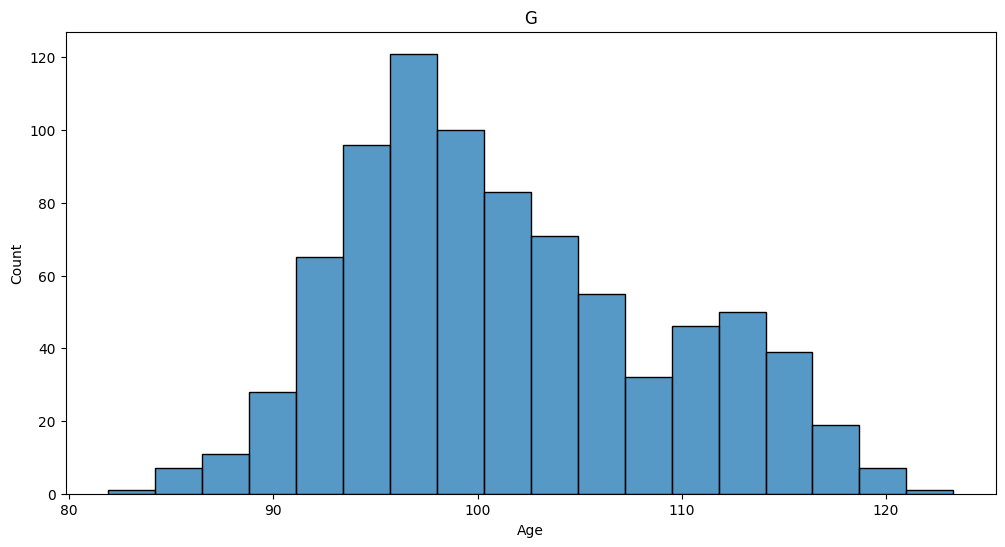

In [29]:
plt.figure(figsize=(12, 6)) # setting the weidth and the height of the figure
sns.histplot(data=df, x='PTS') # creating a histogram of the age column from the dataset
plt.title('G')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\syedz\AppData\Local\Temp\ipykernel_11540\4203670891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


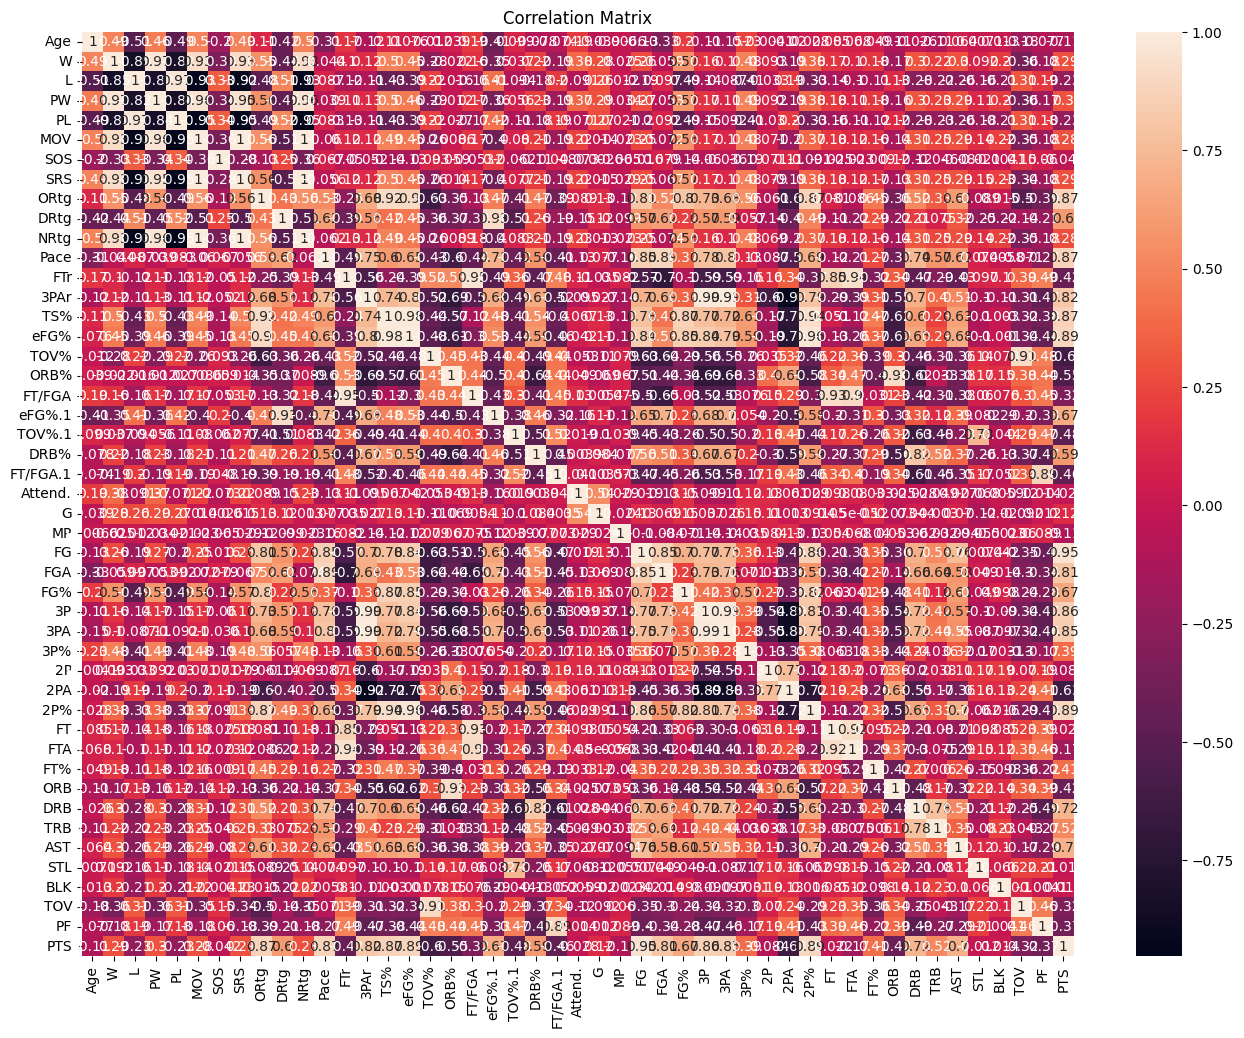

In [31]:
# Look for relationships between features using correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()